# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


In [69]:
import pandas as pd

file_path = "./data/airbnb_hw.csv"
df = pd.read_csv(file_path)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [70]:
df["Price"].unique()
price = df['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce') 
print( price.unique() , '\n')
print( 'Total missing values : ', sum( price.isnull() ) )

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119    62   

The prices above 999 contain commas, making the values in the 'Price' column to be strings. I first replaced all commas with nothing and then converted all of the values to numeric values. All missing values would have been coerced to NaN so they could be easily summed with ".isnull().sum()". There were no missing values reported. 

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 


In [71]:
df = pd.read_csv("./data/mn_police_use_of_force.csv")
print(df["subject_injury"].unique())

missing_count = df["subject_injury"].isna().sum()
total_count = len(df)
missing_proportion = missing_count / total_count
print(f"\nTotal missing values: {missing_count}")
print(f"Proportion of missing values: {missing_proportion:.2%}")


[nan 'No' 'Yes']

Total missing values: 9848
Proportion of missing values: 76.19%


In [72]:
crosstab = pd.crosstab(df["subject_injury"], df["force_type"], dropna=False)
crosstab.loc["NaN"] = df[df["subject_injury"].isna()]["force_type"].value_counts(dropna=False)
crosstab["NaN"] = df[df["force_type"].isna()]["subject_injury"].value_counts(dropna=False)
print(crosstab)

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                0.0        1093.0              131.0      2.0   
Yes               2.0        1286.0               41.0      0.0   
NaN               2.0        7051.0             1421.0      NaN   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                           33.0               34.0          0.0   
Yes                          44.0               40.0          0.0   
NaN                          27.0               74.0         87.0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                 1.0                          0.0   
Yes                                2.0                          0.0   
NaN                               

A significant number of cases involving Bodily Force (7,051) and Chemical Irritants (1,421) lack recorded injury data, suggesting possible inconsistencies in injury reporting for these force types. Similarly, Taser use (985) and Police K9 Bites (31) also show missing injury records, which may indicate incomplete documentation or delays in injury recognition. Additionally, Maximal Restraint Technique (170 cases) also exhibits missing injury data, potentially due to delayed onset of injuries that were not immediately recorded. In contrast, firearm-related incidents have no missing injury records, suggesting more stringent documentation requirements for such cases. These patterns could stem from data entry issues, policy variations across jurisdictions, or classification ambiguities where officers were uncertain whether an injury should be recorded.

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.


In [73]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [74]:
import numpy as np
df.rename(columns={"WhetherDefendantWasReleasedPretrial": "PretrialRelease"}, inplace=True)
print(df["PretrialRelease"].unique())
df["PretrialRelease"] = df["PretrialRelease"].replace(9, np.nan)
df["PretrialRelease"] = pd.to_numeric(df["PretrialRelease"], errors="coerce")
print(df["PretrialRelease"].value_counts(dropna=False))

[9 0 1]
PretrialRelease
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [75]:
length = df['ImposedSentenceAllChargeInContactEvent']
type = df['SentenceTypeAllChargesAtConvictionInContactEvent']

length = pd.to_numeric(length,errors='coerce') 
length_NA = length.isnull() 
print( np.sum(length_NA),'\n') 
print( pd.crosstab(length_NA, type), '\n') 

length = length.mask( type == 4, 0) 
length = length.mask( type == 9, np.nan) 
length_NA = length.isnull() 

print( pd.crosstab(length_NA, type), '\n')
print( np.sum(length_NA),'\n') 

df['ImposedSentenceAllChargeInContactEvent'] = length 
del length, type

9053 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

274 



The cleaning process for ImposedSentenceAllChargeInContactEvent involved converting non-numeric values to NaN to standardize the dataset and analyzing missing data patterns using SentenceTypeAllChargesAtConvictionInContactEvent. Initially, 9,000 out of 23,000 values were missing. Cross-tabulation revealed that a large portion of missing values occurred in cases where charges were dismissed (type == 4). Since dismissed cases do not result in an imposed sentence, these missing values were logically replaced with 0 to indicate no sentence was given. Conversely, cases categorized under type == 9 (unknown or pending sentences) retained their NaN values, as their missingness likely reflected genuine uncertainty rather than data entry omissions. This approach reduced the number of missing values from 9,000 to just 274, significantly improving data completeness while preserving the integrity of the dataset.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.


In [76]:
df = pd.read_excel("./data/GSAF5.xls")
print(df.head())

                  Date    Year        Type        Country              State  \
0  2025-01-23 00:00:00  2025.0  Unprovoked      Australia  Western Australia   
1  2025-01-22 00:00:00  2025.0  Unprovoked      Australia  Western Australia   
2  2025-01-11 00:00:00  2025.0    Provoked            USA             Hawaii   
3  2025-01-02 00:00:00  2025.0  Unprovoked  New Caledonia       Grande Terre   
4  2025-01-02 00:00:00  2025.0  Unprovoked      Australia    South Australia   

                                  Location      Activity  \
0                           Shipwreck Cove       Bathing   
1                           Cheynes beach        Surfing   
2            Off Haleiwa Boat Harbour Oahu        Diving   
3              Islet of Kendek near Koumac  Spearfishing   
4  Granites Beach near Westall Streaky Bay       Surfing   

                                     Name Sex Age  ...  \
0                                    Boy    M  12  ...   
1                             Dale Kittow 

2. Drop any columns that do not contain data.


In [77]:
columns_to_keep = list(df.columns[:df.columns.get_loc("Source") + 1])
df = df[columns_to_keep]
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')


3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?


In [78]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)

df = df[df["Year"] >= 1940]
print(df["Year"].value_counts().sort_index())

Year
1940     24
1941     27
1942     41
1943     28
1944     31
       ... 
2022     98
2023    109
2024     49
2025      6
2026      1
Name: count, Length: 87, dtype: int64


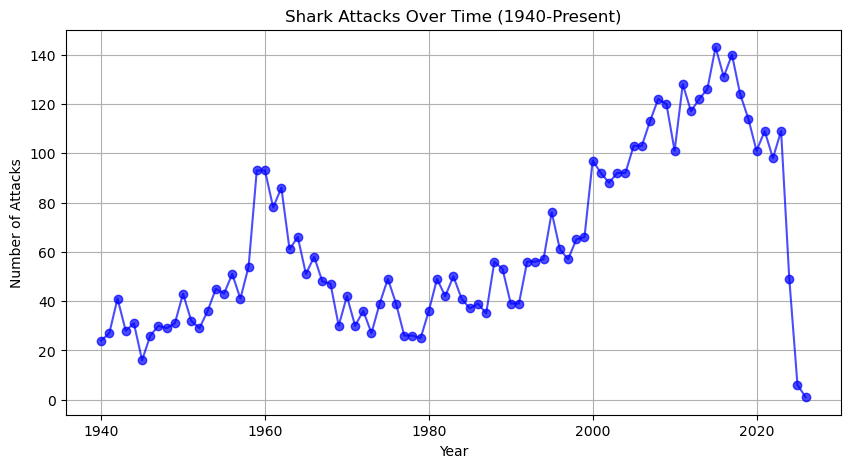

In [79]:
import matplotlib.pyplot as plt

yearly_attacks = df.groupby("Year").size()

plt.figure(figsize=(10,5))
plt.plot(yearly_attacks, marker="o", linestyle="-", color="b", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks Over Time (1940-Present)")
plt.grid(True)
plt.show()


It seems the number of shark attacks has been increasing over the years but has experienced a decline in the past 3 years. 

4. Clean the Age variable and make a histogram of the ages of the victims.


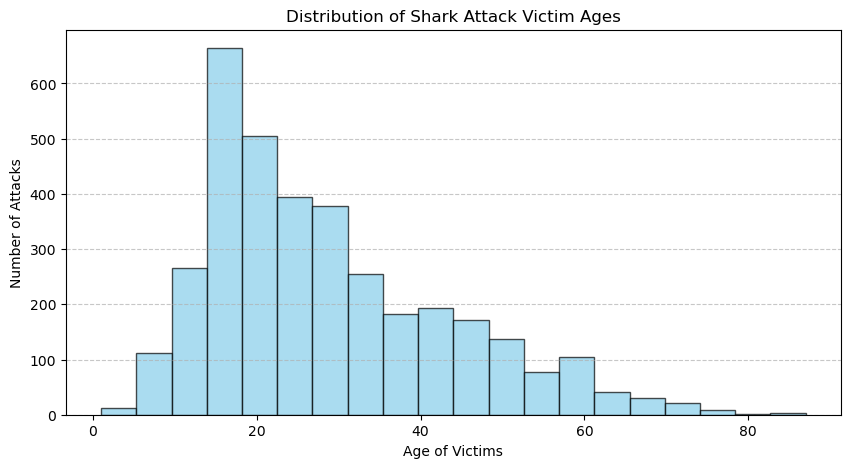

In [80]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
# Drop missing age values
df = df.dropna(subset=["Age"])
df["Age"] = df["Age"].astype(int)

plt.figure(figsize=(10,5))
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Age of Victims")
plt.ylabel("Number of Attacks")
plt.title("Distribution of Shark Attack Victim Ages")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




5. What proportion of victims are male?


In [81]:
df["Sex"] = df["Sex"].astype(str).str.strip().str.lower()
df["Sex"] = df["Sex"].replace({
    "m": "male", "male ": "male", "f": "female", "female ": "female", "lli": np.nan
})

print(df["Sex"].value_counts())

male_count = (df["Sex"] == "male").sum()

known_sex_count = df["Sex"].isin(["male", "female"]).sum()

male_proportion = male_count / known_sex_count

print(f"Proportion of male victims: {male_proportion:.2%}")

Sex
male      2981
female     545
nan         32
Name: count, dtype: int64
Proportion of male victims: 84.54%


6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?


In [82]:
df['Type'].value_counts()
type = df['Type'] 

type = type.replace(['Sea Disaster', 'Boat','Boating','Boatomg'],'Watercraft') 
type.value_counts()
type = type.replace(['Invalid', 'Questionable','Unconfirmed','Unverified','Under investigation', '?'],np.nan)
type.value_counts()
df['Type'] = type 
del type 

df['Type'].value_counts()

total_attacks = df["Type"].notna().sum()
unprovoked_attacks = (df["Type"] == "Unprovoked").sum()
unprovoked_proportion = unprovoked_attacks / total_attacks
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")

Proportion of unprovoked attacks: 88.88%


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.


In [83]:
df["Fatal Y/N"] = df["Fatal Y/N"].astype(str).str.strip().str.upper()

df["Fatal Y/N"] = df["Fatal Y/N"].replace({
    "Y": "Y",  # Keep uppercase "Y"
    "N": "N",  # Keep uppercase "N"
    "UNKNOWN": "Unknown", 
    "F": "Unknown",  # Possibly misclassified or missing data
    "M": "Unknown",  # Potentially a data entry issue
    "?": "Unknown",  # Questionable data
    "2017": "Unknown"  # Possible data corruption
})

df["Fatal Y/N"] = df["Fatal Y/N"].where(df["Fatal Y/N"].isin(["Y", "N"]), "Unknown")

print(df["Fatal Y/N"].value_counts())

Fatal Y/N
N          2825
Y           518
Unknown     216
Name: count, dtype: int64


8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?


In [84]:
unprovoked_attacks = df[df["Type"] == "Unprovoked"]
unprovoked_by_gender = unprovoked_attacks["Sex"].value_counts(normalize=True)

print("Proportion of unprovoked attacks by gender:")
print(unprovoked_by_gender)

fatality_by_type = pd.crosstab(df["Type"], df["Fatal Y/N"], normalize="index")

print("Fatality rates for provoked vs. unprovoked attacks:")
print(fatality_by_type)


fatality_by_gender = pd.crosstab(df["Sex"], df["Fatal Y/N"], normalize="index")


print("Fatality rates for male vs. female victims:")
print(fatality_by_gender)


Proportion of unprovoked attacks by gender:
Sex
male      0.831586
female    0.160974
nan       0.007440
Name: proportion, dtype: float64
Fatality rates for provoked vs. unprovoked attacks:
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.962199  0.010309  0.027491
Unprovoked  0.830967  0.006085  0.162948
Watercraft  0.759494  0.000000  0.240506
Fatality rates for male vs. female victims:
Fatal Y/N         N   Unknown         Y
Sex                                    
female     0.801835  0.064220  0.133945
male       0.793693  0.059376  0.146931
nan        0.656250  0.125000  0.218750


9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [85]:
df["Species "] = df["Species "].astype(str).str.lower()

white_shark_attacks = df[df["Species "].str.contains("white", na=False)]

proportion_white_shark = len(white_shark_attacks) / len(df)

print(f"Proportion of attacks by white sharks: {proportion_white_shark:.2%}")


Proportion of attacks by white sharks: 13.21%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1.) Hadley Wickham explores data cleaning at a deeper level, recognizing that it is often overlooked despite being a crucial part of data analysis. Beyond simply removing missing values (NA), he proposes a structured approach to determine when data can be considered "clean." He introduces the concept of tidy data, where each row represents an observation, each column corresponds to a variable, and each type of observational unit is in its own table. The paper then examines the benefits of this framework.

2.) Data cleaning is an essential yet underappreciated step in data analysis, requiring significant time and effort. The tidy data standard is designed to streamline and standardize the data cleaning process. By establishing a clear goal for what clean data should look like, it makes data preparation more efficient and less ambiguous. This standardization allows analysts to work more effectively, knowing exactly what structure they should be aiming for.

3.) The first phrase suggests that all tidy datasets share the same structure and are easy to work with, while messy datasets vary widely in their inconsistencies and require unique cleaning solutions. Data is often structured in ways that were convenient for its original creators, making it difficult for others to analyze without significant modifications. The quote is a reference to a famous line from Russian literature, implying that messiness has infinite variations. For the second phrase: At first glance, data organization seems straightforward—rows represent observations, and columns represent variables. However, defining these concepts universally is tricky. Misidentifying this structure can lead to poor data cleaning and misinterpretation.

4.) A dataset consists of values, which can be numerical or categorical. Each value belongs to both a variable and an observation. A variable is a collection of values that measure the same characteristic (e.g., height orcolor). An observation is a collection of values that describe a single entity at a specific point (e.g., a person’s age, weight, and blood pressure recorded together).

5.) Tidy data follows three rules:
Each variable has its own column.
Each observation has its own row.
Each type of observational unit has its own table.
If data does not follow this structure, it is considered messy.

6.) 
1. Column headers contain values instead of variable names.
Example: A dataset where years (e.g., 2012, 2013, 2014) are column names instead of being in a single "Year" column.
2. Multiple variables are combined into a single column.
Example: A column labeled date that contains "2023-06-05", which actually represents three variables: year, month, and day.
3. Variables are spread across both rows and columns.
Example: Weather data where tmax (maximum temperature) and tmin (minimum temperature) are stored as separate columns instead of being values in a "Temperature Type" column.
4. Multiple types of observational units are mixed in the same table.
Example: A dataset containing both employees and companies, rather than storing them in separate tables.
5. A single observational unit is spread across multiple tables.
Example: Patient data where lab results and medical history are stored in separate tables, making analysis harder.

Why is Table 4 messy? --> In Table 4, the column names are actually values (income levels) rather than variable names. The table needs to be reorganized so that "Income" is a separate column rather than being embedded in the column headers.

What is "melting" a dataset?--> Melting is the process of restructuring a dataset by converting column headers that contain values into rows. This process makes the dataset longer but tidier, ensuring all variables are represented correctly.

7.) Table 11 is messy because it has days as column names, which should instead be stored in a "Date" column. Table 12 corrects this by moving day values into a single "Date" column, making it "molten" (long format). However, Table 12(a) is not fully tidy yet because the "Element" column still contains variable names (tmax, tmin). Table 12(b) is the final tidy version, where temperature type and temperature values are correctly separated.

8.)The "chicken-and-egg" problem with tidy data is that while it simplifies data analysis, there needs to be widespread adoption of tools and workflows that support it. Without tools that make tidy data easy to implement, analysts may not see the value in structuring their data this way. However, without widespread adoption of tidy data principles, developers might not prioritize tools that encourage tidiness. Wickham's vision is for tidy data principles to become deeply embedded in data science culture, leading to better tools and frameworks that make data wrangling easier and more efficient beyond just ggplot2 and dplyr.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?